# Stars Classification practice from Kaggle Star type dataset

#### - brief EDA with few charts and visualization of the data
#### - using various classifiers and RandomSearchCV to find best model

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/star-type-classification/Stars.csv


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [7]:
df = pd.read_csv('/kaggle/input/star-type-classification/Stars.csv')

In [8]:
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,240.0,10497.462500,9552.425037,1939.00000,3344.250000,5776.0000,15055.5000,40000.00
L,240.0,107188.361635,179432.244940,0.00008,0.000865,0.0705,198050.0000,849420.00
R,240.0,237.157781,517.155763,0.00840,0.102750,0.7625,42.7500,1948.50
A_M,240.0,4.382396,10.532512,-11.92000,-6.232500,8.3130,13.6975,20.06
Type,240.0,2.500000,1.711394,0.00000,1.000000,2.5000,4.0000,5.00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [11]:
df.isnull().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

In [12]:
df['Color'].value_counts()

Red                   112
Blue                   56
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
white                   3
Yellowish White         3
Orange                  2
yellowish               2
Whitish                 2
Blue-White              1
Yellowish               1
Orange-Red              1
White-Yellow            1
Pale yellow orange      1
Name: Color, dtype: int64

In [13]:
df['Color'].value_counts().index

Index(['Red', 'Blue', 'Blue-white', 'Blue White', 'yellow-white', 'White',
       'Blue white', 'white', 'Yellowish White', 'Orange', 'yellowish',
       'Whitish', 'Blue-White', 'Yellowish', 'Orange-Red', 'White-Yellow',
       'Pale yellow orange'],
      dtype='object')

In [14]:
# rename colors to remove some redundant names and merge colors which have only few counts
rename_col = {
    'Red' : 'Red',
    'Blue' : 'Blue',
    'Blue-white' : 'Blue-white',
    'Blue White' : 'Blue-white',
    'yellow-white' : 'Yellow-white',
    'White' : 'White',
    'Blue white' : 'Blue-white',
    'white' : 'White',
    'Yellowish White' : 'Yellow-white',
    'Orange' : 'Orange',
    'Whitish' : 'White',
    'yellowish' : 'Yellow',
    'Pale yellow orange' : 'Orange',
    'White-Yellow' : 'Yellow-white',
    'Blue-White' : 'Blue-white',
    'Yellowish' : 'Yellow',
    'Orange-Red' : 'Orange'
}

In [15]:
# change the type as category
df['Color'] = df['Color'].map(rename_col).astype('category')

In [16]:
df['Color'].value_counts()

Red             112
Blue             56
Blue-white       41
White            12
Yellow-white     12
Orange            4
Yellow            3
Name: Color, dtype: int64

In [17]:
df['Spectral_Class'].value_counts()

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral_Class, dtype: int64

In [18]:
df['Type'].value_counts()

0    40
1    40
2    40
3    40
4    40
5    40
Name: Type, dtype: int64

In [19]:
name_type = {
    0 : 'Red Dwarf',
    1 : 'Brown Dwarf',
    2 : 'White Dwarf',
    3 : 'Main Sequence' ,
    4 : 'Super Giants',
    5 : 'Hyper Giants'
}

In [20]:
df['Class'] = df['Type'].map(name_type).astype('category')

In [21]:
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type,Class
0,3068,0.002400,0.1700,16.12,Red,M,0,Red Dwarf
1,3042,0.000500,0.1542,16.60,Red,M,0,Red Dwarf
2,2600,0.000300,0.1020,18.70,Red,M,0,Red Dwarf
3,2800,0.000200,0.1600,16.65,Red,M,0,Red Dwarf
4,1939,0.000138,0.1030,20.06,Red,M,0,Red Dwarf


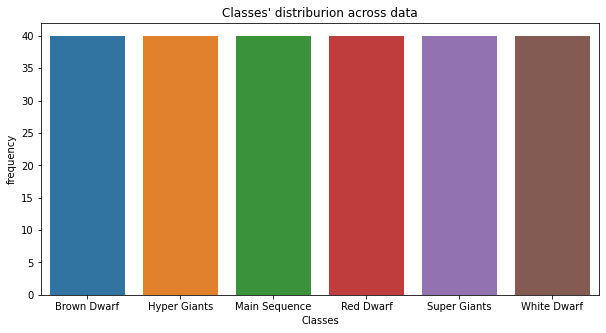

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Class')
plt.title("Classes' distriburion across data", fontsize=12)
plt.xlabel('Classes', fontsize=10)
plt.ylabel('frequency', fontsize=10)
plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Temperature     240 non-null    int64   
 1   L               240 non-null    float64 
 2   R               240 non-null    float64 
 3   A_M             240 non-null    float64 
 4   Color           240 non-null    category
 5   Spectral_Class  240 non-null    object  
 6   Type            240 non-null    int64   
 7   Class           240 non-null    category
dtypes: category(2), float64(3), int64(2), object(1)
memory usage: 12.4+ KB


In [24]:
numerical_cols = df.dtypes[(df.dtypes != 'object') & (df.dtypes != 'category')]
numerical_cols

Temperature      int64
L              float64
R              float64
A_M            float64
Type             int64
dtype: object

In [25]:
num_features = ['Temperature', 'L', 'R', 'A_M']

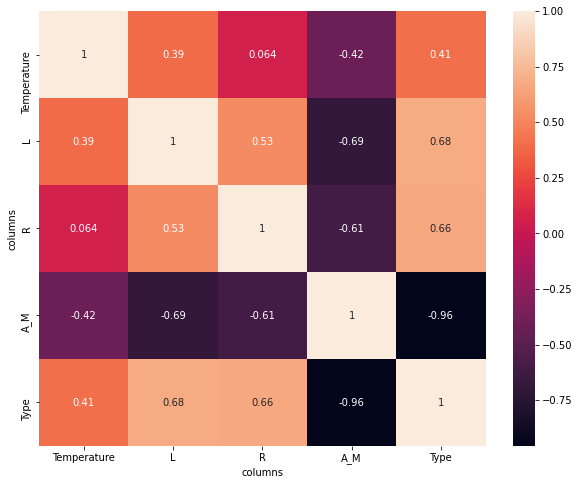

In [26]:
corrPear = df[numerical_cols.index].corr(method='pearson')
corrSpea = df[numerical_cols.index].corr(method='spearman')

plt.figure(figsize=(10,8))
sns.heatmap(corrPear, annot=True)
plt.xlabel('columns')
plt.ylabel('columns')
plt.show()

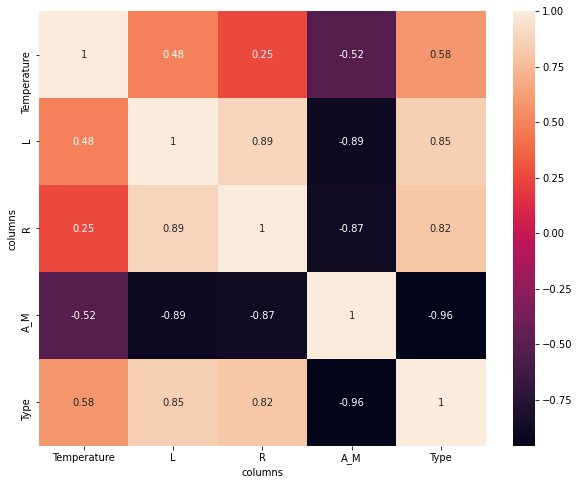

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(corrSpea, annot=True)
plt.xlabel('columns')
plt.ylabel('columns')
plt.show()

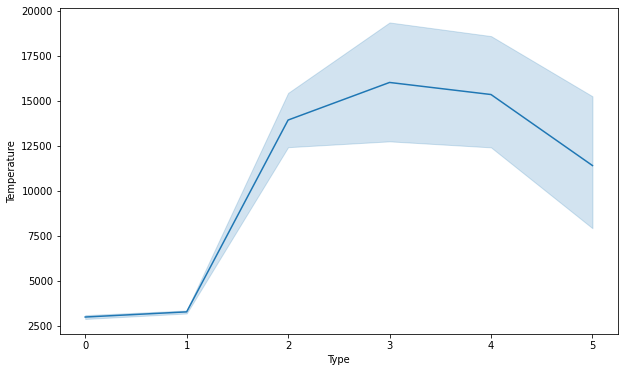

In [28]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Type', y='Temperature')
plt.show()

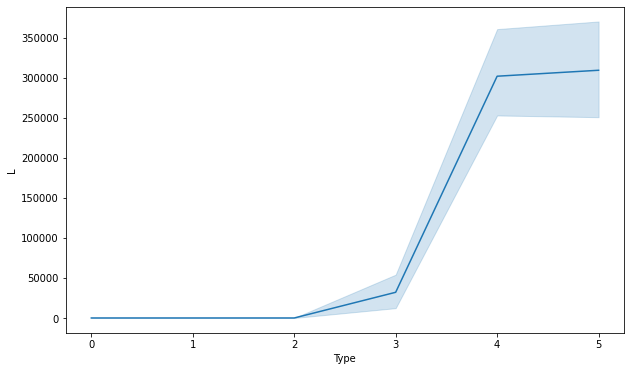

In [29]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Type', y='L')
plt.show()

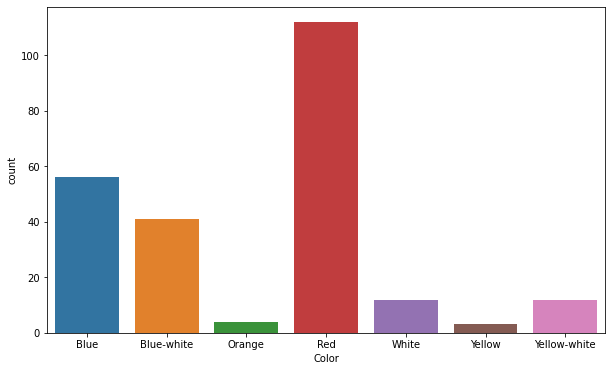

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Color')
plt.show()

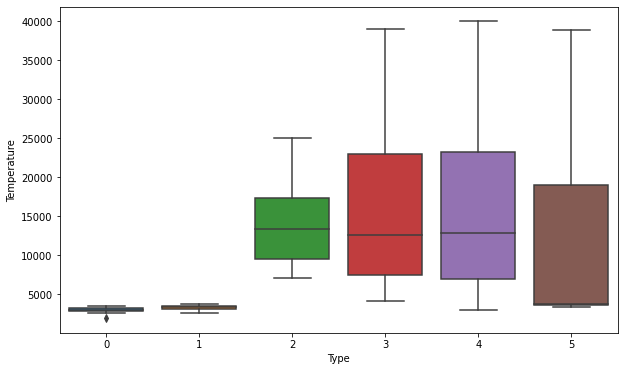

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Type', y='Temperature')
plt.show()

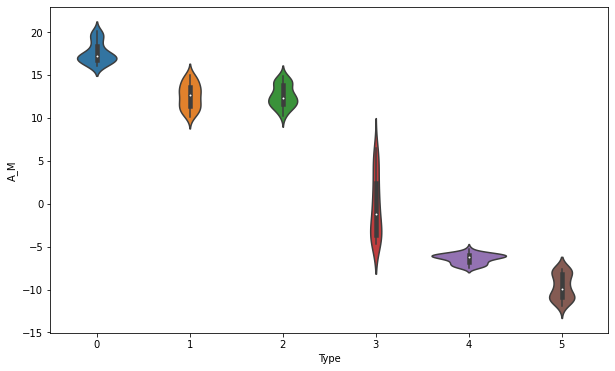

In [32]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='Type', y='A_M')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


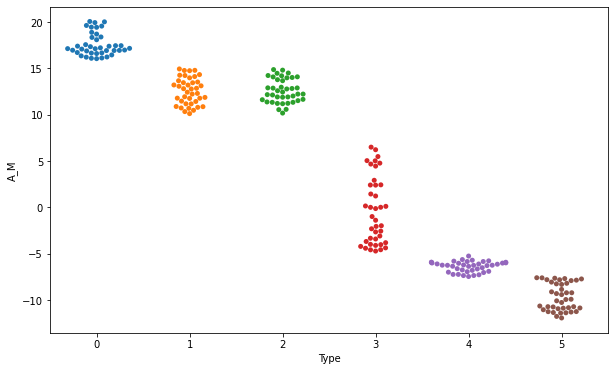

In [33]:
plt.figure(figsize=(10,6))
sns.swarmplot(data=df, x='Type', y='A_M')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

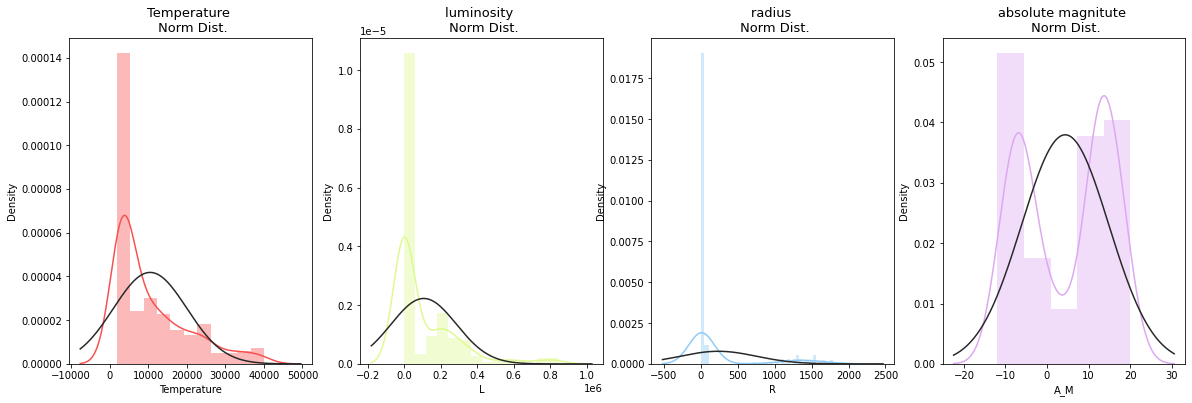

In [34]:
f, ax = plt.subplots(1, 4, figsize=(20,6))

sns.distplot(df['Temperature'], fit=norm, color='#F65151', ax=ax[0])
ax[0].set_title('Temperature \n Norm Dist.', fontsize=13)

sns.distplot(df['L'], fit=norm, color='#DEF991', ax=ax[1])
ax[1].set_title('luminosity \n Norm Dist.', fontsize=13)

sns.distplot(df['R'], fit=norm, color='#8ECAF7', ax=ax[2])
ax[2].set_title('radius \n Norm Dist.', fontsize=13)

sns.distplot(df['A_M'], fit=norm, color='#DDA8F1', ax=ax[3])
ax[3].set_title('absolute magnitute \n Norm Dist.', fontsize=13)

plt.show()

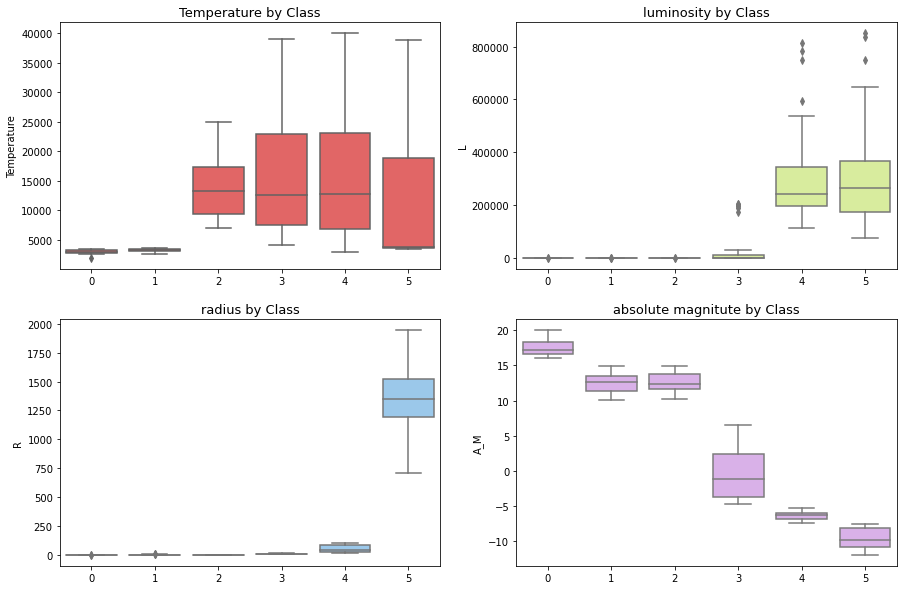

In [35]:
f, ax = plt.subplots(2, 2, figsize=(15,10))

sns.boxplot(data=df, x='Type', y='Temperature', color='#F65151', ax=ax[0][0])
ax[0][0].set_title('Temperature by Class', fontsize=13)
ax[0][0].set_xlabel(' ')

sns.boxplot(data=df, x='Type', y='L', color='#DEF991', ax=ax[0][1])
ax[0][1].set_title('luminosity by Class', fontsize=13)
ax[0][1].set_xlabel(' ')

sns.boxplot(data=df, x='Type', y='R', color='#8ECAF7', ax=ax[1][0])
ax[1][0].set_title('radius by Class', fontsize=13)
ax[1][0].set_xlabel(' ')

sns.boxplot(data=df, x='Type', y='A_M', color='#DDA8F1', ax=ax[1][1])
ax[1][1].set_title('absolute magnitute by Class', fontsize=13)
ax[1][1].set_xlabel(' ')

plt.show()

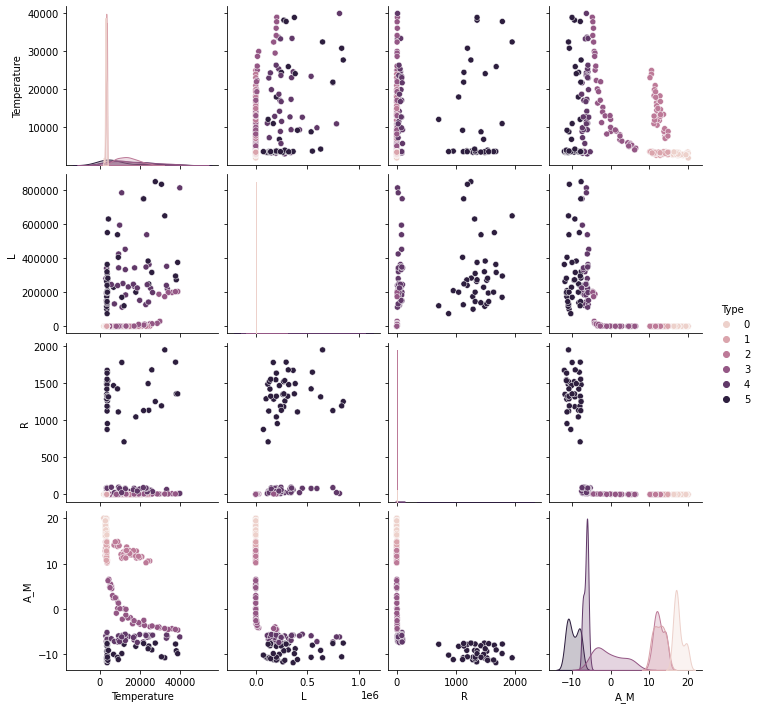

In [36]:
sns.pairplot(data=df, hue="Type")
plt.show()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Temperature     240 non-null    int64   
 1   L               240 non-null    float64 
 2   R               240 non-null    float64 
 3   A_M             240 non-null    float64 
 4   Color           240 non-null    category
 5   Spectral_Class  240 non-null    object  
 6   Type            240 non-null    int64   
 7   Class           240 non-null    category
dtypes: category(2), float64(3), int64(2), object(1)
memory usage: 12.4+ KB


In [38]:
cat_feat = df.drop(['Temperature', 'L', 'R', 'A_M', 'Type', 'Class'], axis=1)
num_feat = df.drop(['Color', 'Spectral_Class', 'Type', 'Class'], axis=1)

In [39]:
dummy = pd.get_dummies(cat_feat)
dummy

,Color_Blue,Color_Blue-white,Color_Orange,Color_Red,Color_White,Color_Yellow,Color_Yellow-white,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,1,0,0,0,0,0,0,0,0,0,0,0,0,1
236,1,0,0,0,0,0,0,0,0,0,0,0,0,1
237,0,0,0,0,1,0,0,1,0,0,0,0,0,0
238,0,0,0,0,1,0,0,1,0,0,0,0,0,0


In [40]:
# Scaling
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(num_feat)
df_scaled = pd.DataFrame(df_scaled, columns=num_feat.columns)
df_scaled.head()

,Temperature,L,R,A_M
0,0.029663,2.731275e-09,0.000083,0.876798
1,0.028980,4.944550e-10,0.000075,0.891807
2,0.017367,2.590003e-10,0.000048,0.957473
3,0.022622,1.412729e-10,0.000078,0.893371
4,0.000000,6.828189e-11,0.000049,1.000000


In [41]:
df_comp = pd.concat([df_scaled, dummy], axis=1)
df_comp.head()

,Temperature,L,R,A_M,Color_Blue,Color_Blue-white,Color_Orange,Color_Red,Color_White,Color_Yellow,Color_Yellow-white,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,0.029663,2.731275e-09,0.000083,0.876798,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,0.028980,4.944550e-10,0.000075,0.891807,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,0.017367,2.590003e-10,0.000048,0.957473,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,0.022622,1.412729e-10,0.000078,0.893371,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,0.000000,6.828189e-11,0.000049,1.000000,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [42]:
from sklearn.model_selection import train_test_split

labels = df['Class']

X_train, X_test, y_train, y_test = train_test_split(df_comp, labels, test_size=0.2, shuffle=True, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=True, random_state=42)

In [50]:
# Machine Learning Libraries

import sklearn
from sklearn.model_selection import KFold, cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report

from sklearn import tree
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier

In [44]:
# Logistic Regression

log_reg = LogisticRegression(random_state=42)
lg_model = log_reg.fit(X_train, y_train)
pred = lg_model.predict(X_val)

print(classification_report(y_val, pred, target_names=df['Class'].unique()))

               precision    recall  f1-score   support

    Red Dwarf       1.00      1.00      1.00         2
  Brown Dwarf       1.00      1.00      1.00         4
  White Dwarf       0.67      1.00      0.80         2
Main Sequence       1.00      1.00      1.00         2
 Super Giants       1.00      1.00      1.00         6
 Hyper Giants       1.00      0.75      0.86         4

     accuracy                           0.95        20
    macro avg       0.94      0.96      0.94        20
 weighted avg       0.97      0.95      0.95        20



In [45]:
# Random Forest
RF = RandomForestClassifier(random_state=42)
rf_model = RF.fit(X_train, y_train)
pred = rf_model.predict(X_val)

print(classification_report(y_val, pred, target_names=df['Class'].unique()))

               precision    recall  f1-score   support

    Red Dwarf       1.00      1.00      1.00         2
  Brown Dwarf       1.00      1.00      1.00         4
  White Dwarf       1.00      1.00      1.00         2
Main Sequence       1.00      1.00      1.00         2
 Super Giants       1.00      1.00      1.00         6
 Hyper Giants       1.00      1.00      1.00         4

     accuracy                           1.00        20
    macro avg       1.00      1.00      1.00        20
 weighted avg       1.00      1.00      1.00        20



In [46]:
# Feature importance for Random Forest

importance_rf = rf_model.feature_importances_
features = list(zip(importance_rf, X_train.columns))

for i, v in enumerate(features):
    print(str(features[i][1]) + ' : ' + '%.4f' % v[0])

Temperature : 0.1100
L : 0.1307
R : 0.2925
A_M : 0.3049
Color_Blue : 0.0262
Color_Blue-white : 0.0119
Color_Orange : 0.0007
Color_Red : 0.0463
Color_White : 0.0013
Color_Yellow : 0.0008
Color_Yellow-white : 0.0017
Spectral_Class_A : 0.0031
Spectral_Class_B : 0.0088
Spectral_Class_F : 0.0046
Spectral_Class_G : 0.0000
Spectral_Class_K : 0.0024
Spectral_Class_M : 0.0359
Spectral_Class_O : 0.0181


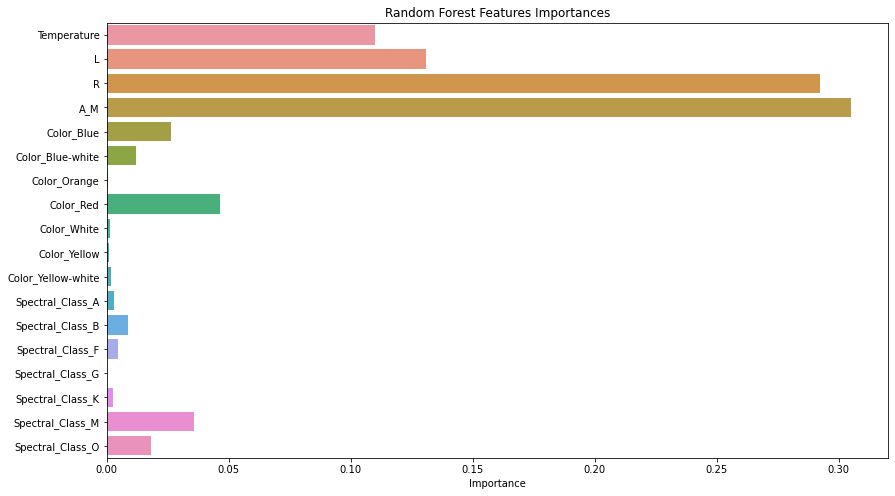

In [47]:
plt.figure(figsize=(14,8))
sns.barplot(x=importance_rf, y=X_train.columns)
plt.title('Random Forest Features Importances', fontsize=12)
plt.xlabel('Importance', fontsize=10)
plt.show()

In [86]:
labels = df['Class']

X_train, X_test, y_train, y_test = train_test_split(df_comp, labels, test_size=0.2, shuffle=True, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=True, random_state=42)

In [87]:
# comparing different models

lg = LogisticRegression(random_state=42).fit(X_train, y_train)
knn = KNeighborsClassifier().fit(X_train, y_train)
rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)
gb = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)
lgbm = LGBMClassifier(random_state=42).fit(X_train, y_train)

In [84]:
models = [lg, knn, rf, gb, lgbm]

In [85]:
results = pd.DataFrame(columns=['Model', 'RS2CV', 'error'])
for model in models:
    name = model.__class__.__name__
    rs2cv = cross_val_score(model, X_test, y_test, cv=10, verbose=False).mean()
    error = -cross_val_score(model, X_test, y_test, cv=10, scoring='neg_mean_squared_error', verbose=False).mean()
    result = pd.DataFrame([[name, rs2cv*100, np.sqrt(error)]], columns=['Model', 'RS2CV', 'error'])
    results = results.append(result)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class

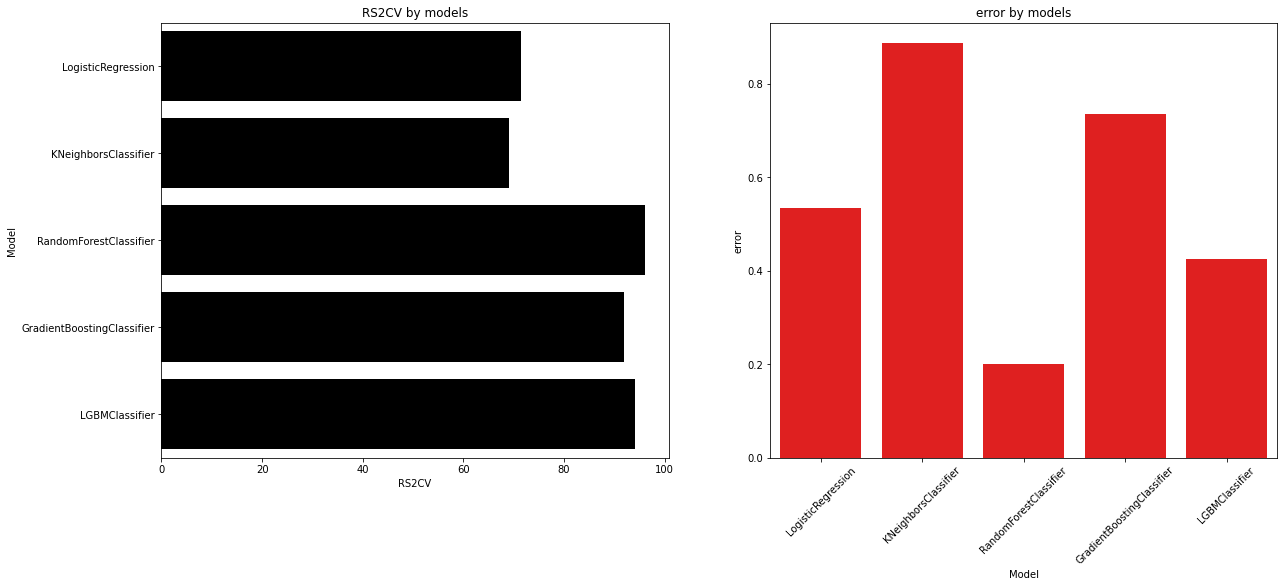

                        Model  RS2CV     error
0          LogisticRegression   71.5  0.533854
0        KNeighborsClassifier   69.0  0.886002
0      RandomForestClassifier   96.0  0.200000
0  GradientBoostingClassifier   92.0  0.734847
0              LGBMClassifier   94.0  0.424264


In [94]:
f, ax = plt.subplots(1, 2, figsize=(20,8))

sns.barplot(data=results, x='RS2CV', y='Model', color='black', ax=ax[0])
ax[0].set_title('RS2CV by models', fontsize=12)

sns.barplot(data=results, x='Model', y='error', color='red', ax=ax[1])
ax[1].set_title('error by models', fontsize=12)
plt.xticks(rotation=45)
plt.show()

print(results)

In [99]:
rf_model = RandomForestClassifier(random_state=42)

max_depth = np.random.randint(2,10, 6)
max_features = np.random. uniform(0.2, 1.0, 10)

param_dist = {'max_depth':max_depth, 'max_features':max_features}

clf = RandomizedSearchCV(rf_model,
                     param_dist,
                     n_iter=30,
                     scoring='accuracy',
                     n_jobs=-1,
                     cv=5,
                     verbose=2)
clf

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': array([6, 6, 5, 8, 7, 8]),
                                        'max_features': array([0.96891711, 0.52723214, 0.91766027, 0.88063275, 0.41218322,
       0.87565142, 0.48646965, 0.6108926 , 0.73338275, 0.67018738])},
                   scoring='accuracy', verbose=2)

In [100]:
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
rs2cv = cross_val_score(clf, X_test, y_test, cv=5, verbose=False).mean()
print(rs2cv)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
0.9800000000000001


In [ ]:
clf.best_params_
clf.best_score_
clf.score(X_test, y_test)
clf.cv_results_

In [105]:
# Find best model with Randomized Search
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

estimators = [rf_model, gb_model]

max_depth = np.random.randint(2,10, 6)
max_features = np.random. uniform(0.2, 1.0, 10)

param_dist = {'max_depth':max_depth, 'max_features':max_features}

results = []
for est in estimators:
    result = []
    clf = RandomizedSearchCV(est,
                     param_dist,
                     n_iter=30,
                     scoring='accuracy',
                     n_jobs=-1,
                     cv=5,
                     verbose=2)
    
    clf.fit(X_train, y_train)
    result.append(est.__class__.__name__)
    result.append(clf.best_params_)
    result.append(clf.best_score_)
    result.append(clf.score(X_val, y_val))
    result.append(clf.cv_results_)
    results.append(result)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [106]:
df = pd.DataFrame(results, columns=['model', 'best_params', 'train_score', 'test_score', 'cv_result'])
df.head()

,model,best_params,train_score,test_score,cv_result
0,RandomForestClassifier,"{'max_features': 0.3188945305420483, 'max_dept...",1.0,1.0,"{'mean_fit_time': [0.22640624046325683, 0.2269..."
1,GradientBoostingClassifier,"{'max_features': 0.9440229086979441, 'max_dept...",1.0,1.0,"{'mean_fit_time': [1.0044044494628905, 1.05183..."


In [111]:
# RandomForest Model parameters comparison 
pd.DataFrame(df.loc[0, 'cv_result']).sort_values(by='rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.226406,0.002287,0.020633,0.001094,0.318895,8,"{'max_features': 0.3188945305420483, 'max_dept...",1.0,1.000000,1.0,1.0,1.0,1.000000,0.000000,1
23,0.231680,0.007256,0.020872,0.000504,0.291754,9,"{'max_features': 0.29175432002514845, 'max_dep...",1.0,1.000000,1.0,1.0,1.0,1.000000,0.000000,1
21,0.235765,0.010145,0.025863,0.006336,0.291754,8,"{'max_features': 0.29175432002514845, 'max_dep...",1.0,1.000000,1.0,1.0,1.0,1.000000,0.000000,1
3,0.229104,0.009795,0.020788,0.000845,0.252227,9,"{'max_features': 0.25222735643533484, 'max_dep...",1.0,1.000000,1.0,1.0,1.0,1.000000,0.000000,1
20,0.223222,0.002126,0.021564,0.002645,0.291754,7,"{'max_features': 0.29175432002514845, 'max_dep...",1.0,1.000000,1.0,1.0,1.0,1.000000,0.000000,1
18,0.230550,0.006661,0.021085,0.000842,0.252227,4,"{'max_features': 0.25222735643533484, 'max_dep...",1.0,1.000000,1.0,1.0,1.0,1.000000,0.000000,1
13,0.234694,0.007680,0.024555,0.007326,0.318895,9,"{'max_features': 0.3188945305420483, 'max_dept...",1.0,1.000000,1.0,1.0,1.0,1.000000,0.000000,1
5,0.230108,0.005628,0.019999,0.000388,0.784543,8,"{'max_features': 0.7845426879581632, 'max_dept...",1.0,0.971429,1.0,1.0,1.0,0.994286,0.011429,8
17,0.226768,0.001266,0.021108,0.000431,0.597806,2,"{'max_features': 0.5978063035831386, 'max_dept...",1.0,0.971429,1.0,1.0,1.0,0.994286,0.011429,8
8,0.230768,0.001665,0.020089,0.000181,0.784543,7,"{'max_features': 0.7845426879581632, 'max_dept...",1.0,0.971429,1.0,1.0,1.0,0.994286,0.011429,8


In [113]:
# GradientBoost Model parameters comparison 
pd.DataFrame(df.loc[1, 'cv_result']).sort_values(by='rank_test_score').head(20)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
14,1.982913,0.151624,0.007391,0.000973,0.318895,7,"{'max_features': 0.3188945305420483, 'max_dept...",1.0,1.000000,1.0,1.000000,1.0,1.000000,0.000000,1
16,1.715826,0.139095,0.006826,0.000224,0.252227,9,"{'max_features': 0.25222735643533484, 'max_dep...",1.0,1.000000,1.0,1.000000,1.0,1.000000,0.000000,1
28,1.266789,0.251443,0.006026,0.000359,0.445419,8,"{'max_features': 0.44541903413481104, 'max_dep...",1.0,1.000000,1.0,1.000000,1.0,1.000000,0.000000,1
21,1.484889,0.110471,0.006463,0.000374,0.291754,9,"{'max_features': 0.29175432002514845, 'max_dep...",1.0,1.000000,1.0,1.000000,1.0,1.000000,0.000000,1
12,0.956355,0.053497,0.005666,0.000199,0.944023,4,"{'max_features': 0.9440229086979441, 'max_dept...",1.0,1.000000,1.0,1.000000,1.0,1.000000,0.000000,1
18,1.443471,0.108596,0.006315,0.000260,0.291754,9,"{'max_features': 0.29175432002514845, 'max_dep...",1.0,1.000000,1.0,1.000000,1.0,1.000000,0.000000,1
8,1.058960,0.067800,0.005905,0.000178,0.944023,9,"{'max_features': 0.9440229086979441, 'max_dept...",1.0,1.000000,1.0,1.000000,1.0,1.000000,0.000000,1
9,1.177295,0.185275,0.006047,0.000380,0.716929,8,"{'max_features': 0.716929180982997, 'max_depth...",1.0,1.000000,1.0,1.000000,1.0,1.000000,0.000000,1
25,1.011060,0.093159,0.005661,0.000183,0.882717,7,"{'max_features': 0.8827171454239688, 'max_dept...",1.0,1.000000,1.0,1.000000,1.0,1.000000,0.000000,1
2,1.449839,0.106807,0.006322,0.000108,0.318895,9,"{'max_features': 0.3188945305420483, 'max_dept...",1.0,1.000000,1.0,1.000000,1.0,1.000000,0.000000,1
